In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

<h1>Работаем со светочными сетями</h1>

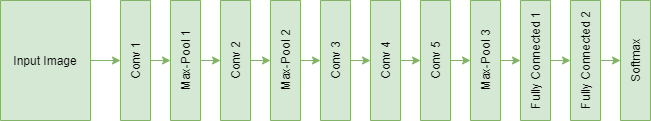

Обучать сверточные нейросети уже не так просто, как линейные - больше данных, больше параметров. Поэтому чтобы ускорять обучение, будем пользоваться видеокартой.



In [3]:
# Чтобы узнать, доступна ли видеокарта через торч, пишем вот такое
# на колабе должно выдавать True
# если запускаете у себя на компе, нужно немного повозиться и поставить правильную версию торча
# https://pytorch.org/get-started/locally/ 

torch.cuda.is_available()

False

In [4]:
# хорошая практика - в начале обучения смотрим какое у нас устройство, фиксируем его
# cuda - значит обучаемся на видеокарте, модель хранится в ее памяти 
# cpu - обучаемся "на процессоре", модель хранится в оперативной памяти

 
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
x = torch.zeros(3,4)

# теперь, чтобы переместить что-нибудь на это устройство пишем:
x.to(device)

# это нам нужно, чтобы все матрицы находились на одном устройстве
# и сама модель и входные данные
# ведь, согласитесь, будет странно, если модель на видеокарте, а входная картинка осталась на cpu

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
import torch.nn.functional as F
# обявляем нашу модель, тут с архитектурой можно играться как угодно, главное чтобы сходилось!
# не забываем трекать что какой размер картинки на каком этапе
# входная картинка - 3 * 32 * 32
# на выходе нужно получить 10 чисел - вероятности для каждого класса
# forward тоже можно менять)

# не забываем про фукнции активации, batchnorm, dropout!

class CustomModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomModel, self).__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            ....

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
            )
        self.linear = nn.Sequential(
            ...
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        
        return self.linear(self.convs(x))

Files already downloaded and verified


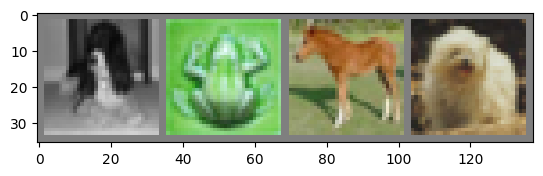

  dog  frog horse   dog


In [8]:
# Загрузка CIFAR-10 датасета
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Загружаем CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# testset = ...
# testloader = ...

# Классы CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Функция для отображения изображений
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получаем случайные изображения из тренировочного датасета
images, labels = next(iter(trainloader))

# Отображаем изображения
imshow(torchvision.utils.make_grid(images))
# Выводим метки
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
images[0].shape

torch.Size([3, 32, 32])

In [ ]:
# Инициализация модели, функции потерь и оптимизатора
num_classes = ...  # Для CIFAR-10 у нас 10 классов
# Переносим модель на CUDA
custom_model = ...(num_classes=num_classes).cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(custom_model.parameters(), lr=0.001, momentum=0.9)
# Переносим данные на CUDA
images, labels = ..., ...

In [ ]:
# Обучение нашей нейросети
num_epochs = 5
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()  # Переносим данные на CUDA
        optimizer.zero_grad()
        outputs = custom_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Тестирование нейросети
correct = 0
total = 0
with torch.no_grad():
    for data in ...:
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()  # Переносим данные на CUDA
        outputs = custom_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * ... / ...))

Accuracy of the network on the 10000 test images: 78 %


<h1>Продвинутая часть, новогодняя</h1>

Приготовьте любимое новогоднее блюдо, закиньте вашу довольную фотку в чатик курса)


ИЛИ

Запишите кружочек с новогодним обращением

С наступающим)!